### (2) 미래 도시

방문 판매원 A는 많은 회사가 모여 있는 공중 미래 도시에 있다. 공중 미래 도시에는 **1번부터 N번까지의 회사** 가 있는데 특정 회사끼리는 서로 도로를 통해 연결되어 있다. 방문 판매원 **A는 현재 1번 회사에 위치** 해 있으며, **X번 회사에 방문** 해 물건을 판매하고자 한다.

공중 미래 도시에서 특정 회사에 도착하기 위한 방법은 회사끼리 연결되어 있는 도로를 이용하는 방법이 유일하다. 또한 연결된 2개의 회사는 양방향으로 이동할 수 있다. 공중 미래 도시에서의 도로는 마하의 속도로 사람을 이동시켜주기 때문에 특정 회사와 다른 회사가 도로로 연결되어 있다면, 정확히 1만큼의 시간으로 이동할 수 있다.

또한 오늘 방문 판매원 A는 기대하던 소개팅에도 참가하고자 한다. 소개팅의 상대는 K번 회사에 존재한다. 방문 판매원 A는 X번 회사에 가서 물건을 판매하기 전에 먼저 소개팅 상대의 회사에 찾아가서 함께 커피를 마실 예정이다. 따라서 방문 판매원 A는 1번 회사에서 출발하여 K번 회사를 방문한 뒤에 X번 회사로 가는 것이 목표다. 이때 방문 판매원 A는 가능한 한 빠르게 이동하고자 한다. 방문 판매원이 회사 사이를 이동하게 되는 최소 시간을 계산하는 프로그램을 작성하시오. 이때 소개팅 상대방과 커피를 마시는 시간 등은 고려하지 않는다고 가정한다.

예를 들어 N = 5, X = 4, K = 5이고 회사 간 도로가 7개면서 각 도로가 다음과 같이 연결되어 있을 때를 가정할 수 있다.


**(1번, 2번), (1번, 3번), (1번, 4번), (2번, 4번), (3번, 4번), (3번,5번), (4번,5번)**

이때 방문 판매원 A가 최종적으로 4번 회사에 가는 경로를 (1번 - 3번 - 5번 - 4번)으로 설정하면, 소개팅에도 참석할 수 있으면서 총 3만큼의 시간으로 이동할 수 있다. 따라서 이 경우 최소 이동 시간은 3이다. 

**입력 조건**
* **첫째 줄**에 전체 **회사의 개수 N** 과 **경로의 개수 M** 이 공백으로 구분되어 차례대로 주어진다. (1 ≤ N, M ≤ 100)
* **둘째 줄부터 M + 1번째 줄에는 연결된 두 회사의 번호**가 공백으로 구분되어 주어진다.
* **M + 2 번째 줄** 에는 **X와 K** 가 공백으로 구분되어 차례대로 주어진다. (1 ≤ K ≤ 100)

**출력 조건**
* 첫째 줄에 방문 판매원 **A가 K번 회사를 거쳐 X번 회사로 가는 최소 이동 시간**을 출력한다.
* 만약 X번 회사에 도달할 수 없다면 -1 을 출력한다.

In [11]:
# 무한대를 나타내는 값으로 10억을 사용
INF = int(1e9)

# 회사의 개수와 경로의 개수 입력 받기
N, M = map(int, input().split())

# 2차원 리스트(그래프 표현)를 만들고, 무한으로 초기화 
graph = [[INF] * (N + 1) for _ in range(N + 1)]

# 자기 자신에서 자신으로 가는 비용은 0으로 초기화
for i in range(1, N + 1):
    graph[i][i] = 0

# 각 간선에 대한 정보를 입력 받아, 그 값으로 초기화
for _ in range(M):
    a, b = map(int, input().split())
    graph[a][b] = 1
    graph[b][a] = 1  # 양방향 도로를 처리하기 위해 추가

X, K = map(int, input().split())

# 점화식에 따라 플로이드 워셜 알고리즘을 수행
for k in range(1, N + 1):
    for a in range(1, N + 1):
        for b in range(1, N + 1):
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

# X번 회사에 도달할 수 없거나 K에서 X로 이동할 수 없는 경우 -1 출력
if graph[1][K] == INF or graph[K][X] == INF or graph[1][X] == INF:
    print(-1)
else:
    result = graph[1][K] + graph[K][X]
    print(result)


5 7
1 2
1 3
1 4
2 4
3 4
3 5
4 5
4 5
3


In [12]:
# 무한대를 나타내는 값으로 10억을 사용
INF = int(1e9)

# 회사의 개수와 경로의 개수 입력 받기
N, M = map(int, input().split())

# 그래프 초기화
graph = [[INF] * (N + 1) for _ in range(N + 1)]

# 자기 자신으로 가는 비용은 0으로 초기화
for i in range(1, N + 1):
    graph[i][i] = 0

# 각 간선에 대한 정보를 입력 받아, 그 값으로 초기화
for _ in range(M):
    a, b = map(int, input().split())
    graph[a][b] = 1
    graph[b][a] = 1  # 양방향 도로를 처리하기 위해 추가

X, K = map(int, input().split())

# 점화식에 따라 플로이드 워셜 알고리즘을 수행
for k in range(1, N + 1):
    for a in range(1, N + 1):
        for b in range(1, N + 1):
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

# X번 회사에 도달할 수 없거나 K에서 X로 이동할 수 없는 경우 -1 출력
if graph[1][K] == INF or graph[K][X] == INF or graph[1][X] == INF:
    print(-1)
else:
    result = graph[1][K] + graph[K][X]
    print(result)


4 2
1 3
2 4
3 4
-1


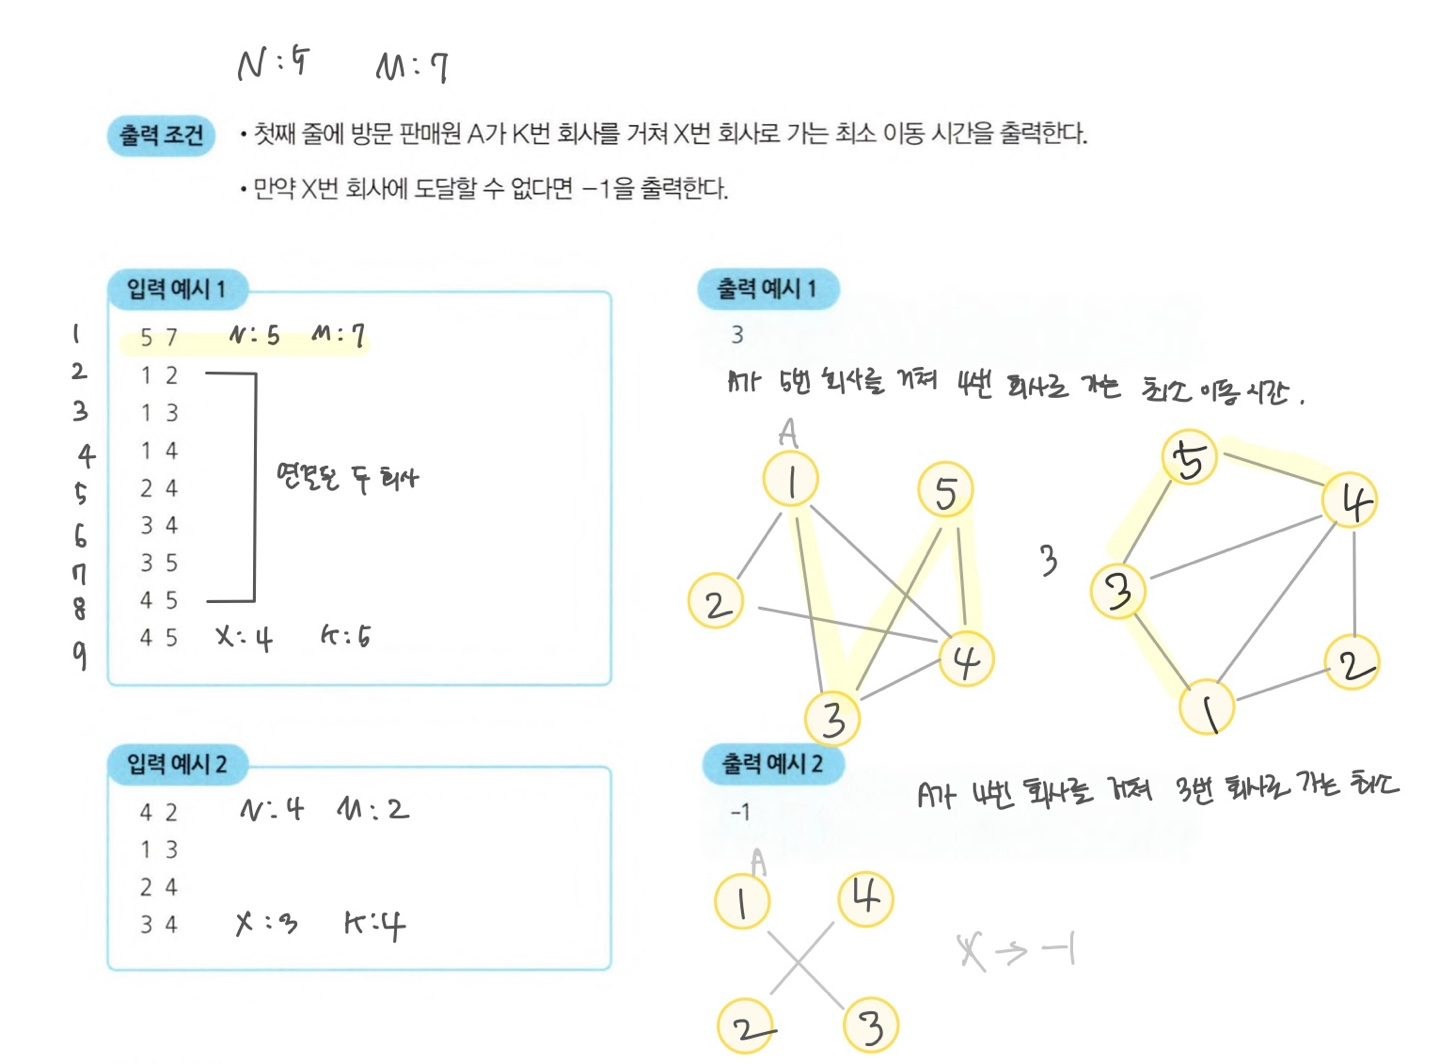